In [21]:
#Import libraries for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Load the data
data = pd.read_csv('marketing_campaign_cleaned.csv')

In [23]:
# Detecting outliers using the IQR method for numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"\nNumber of outliers in {column}: {outliers.shape[0]}")



Number of outliers in ID: 0

Number of outliers in Year_Birth: 3

Number of outliers in Income: 8

Number of outliers in Kidhome: 0

Number of outliers in Teenhome: 0

Number of outliers in Recency: 0

Number of outliers in MntWines: 35

Number of outliers in MntFruits: 227

Number of outliers in MntMeatProducts: 175

Number of outliers in MntFishProducts: 223

Number of outliers in MntSweetProducts: 248

Number of outliers in MntGoldProds: 207

Number of outliers in NumDealsPurchases: 86

Number of outliers in NumWebPurchases: 4

Number of outliers in NumCatalogPurchases: 23

Number of outliers in NumStorePurchases: 0

Number of outliers in NumWebVisitsMonth: 8

Number of outliers in AcceptedCmp3: 163

Number of outliers in AcceptedCmp4: 167

Number of outliers in AcceptedCmp5: 163

Number of outliers in AcceptedCmp1: 144

Number of outliers in AcceptedCmp2: 30

Number of outliers in Complain: 21

Number of outliers in Z_CostContact: 0

Number of outliers in Z_Revenue: 0

Number of o

In [24]:
# Impute outliers with the median value
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = data[column].median()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

print("\nData after imputing outliers with median values:")
print(data.describe())


Data after imputing outliers with median values:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.903125   51630.036161     0.444196     0.506250   
std     3246.662198    11.694144   20564.846848     0.538398     0.544538   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68098.250000     1.000000     1.000000   
max    11191.000000  1996.000000  113734.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   285.683259    14.281250       112.670089   
std      28.962453   310.279574    18.719299       135.044047

In [25]:
# Configure visualizations
sns.set_style(style="whitegrid")

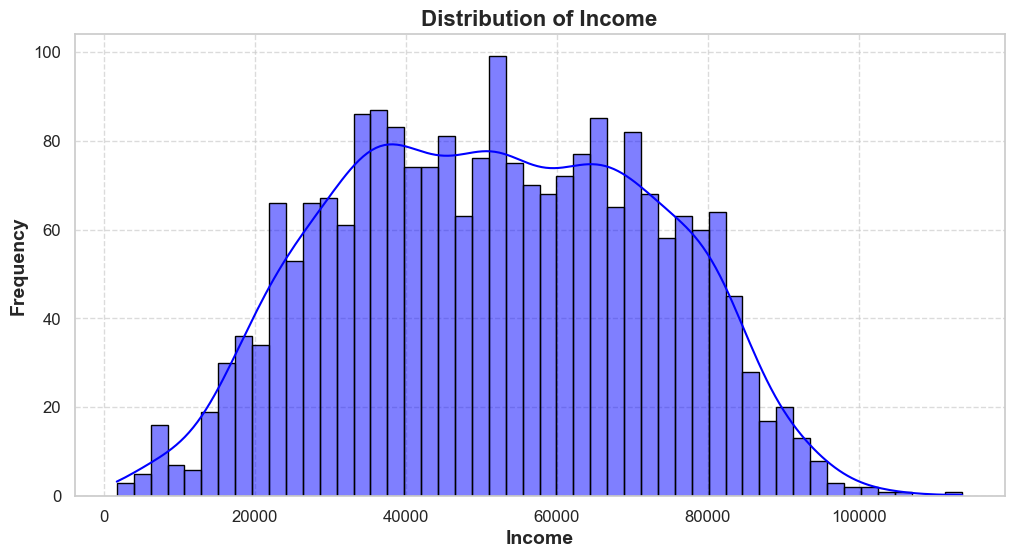

In [26]:
# 1. Distribution of Income
plt.figure(figsize=(12, 6))
sns.histplot(data['Income'], kde=True, color='blue', bins=50, edgecolor='black')
plt.title('Distribution of Income', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

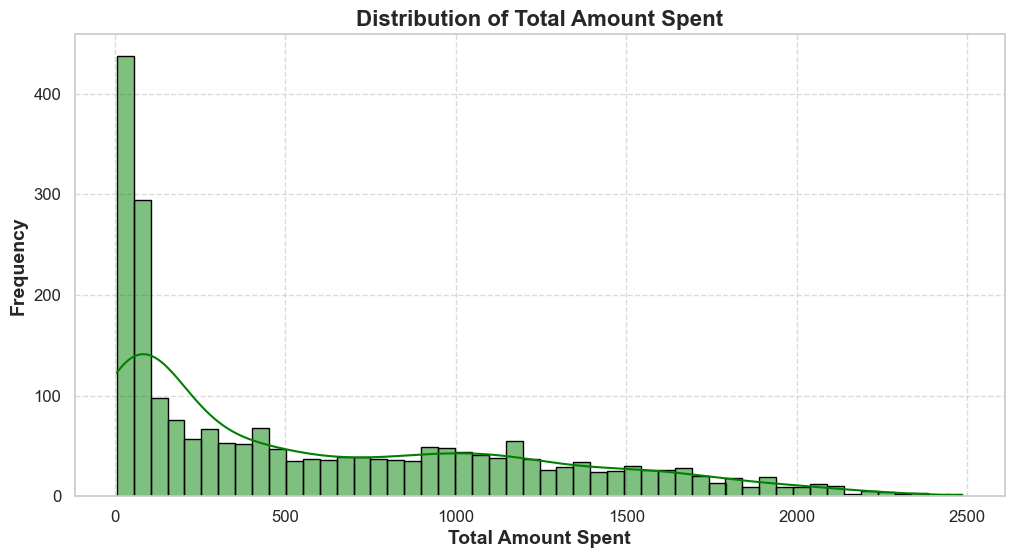

In [27]:
# 2. Distribution of Total Amount Spent
plt.figure(figsize=(12, 6))
sns.histplot(data['Total_MntSpent'], kde=True, color='green', bins=50, edgecolor='black')
plt.title('Distribution of Total Amount Spent', fontsize=16, fontweight='bold')
plt.xlabel('Total Amount Spent', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

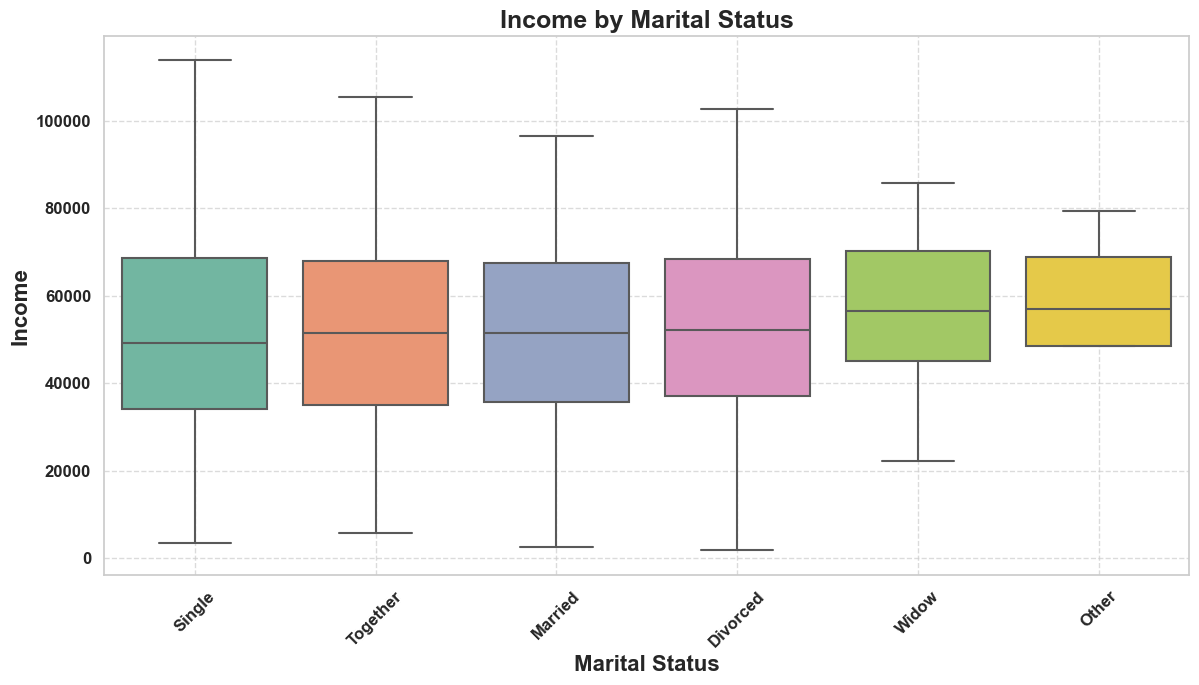

In [29]:
# 3. Box plot of Income by Marital Status
plt.figure(figsize=(14, 7))
sns.boxplot(x='Marital_Status', y='Income', data=data, palette='Set2')
plt.title('Income by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=16, fontweight='bold')
plt.ylabel('Income', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

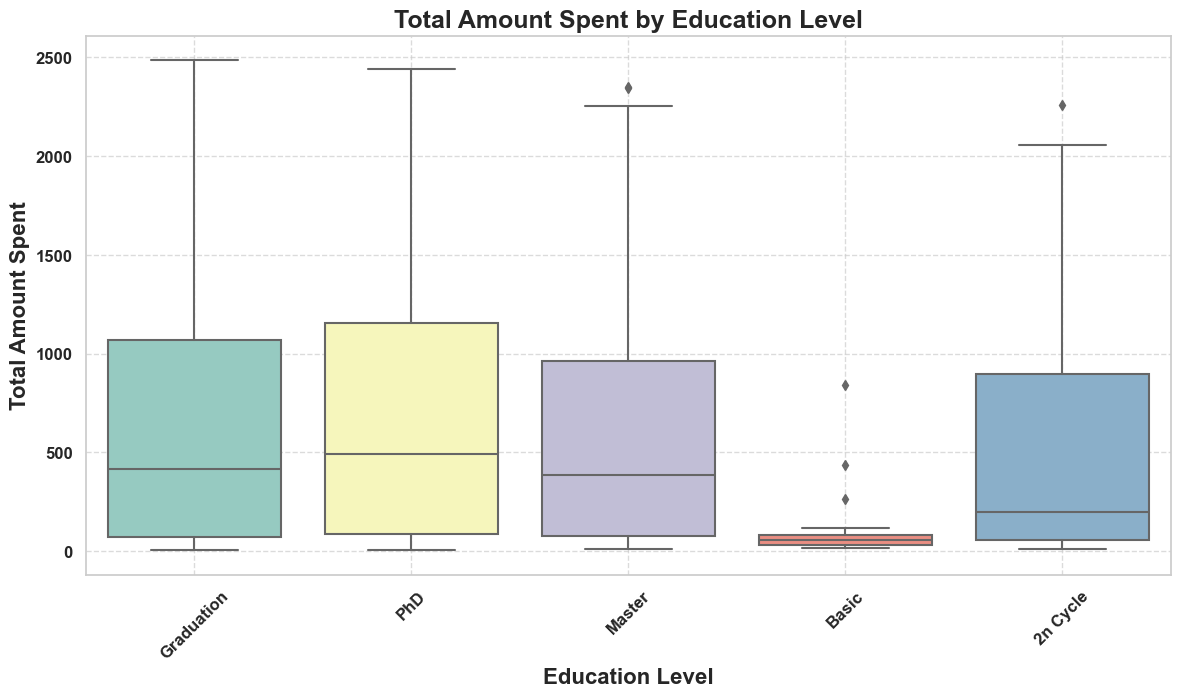

In [31]:
# 4. Box plot of Total Amount Spent by Education Level
plt.figure(figsize=(14, 7))
sns.boxplot(x='Education', y='Total_MntSpent', data=data, palette='Set3')
plt.title('Total Amount Spent by Education Level', fontsize=18, fontweight='bold')
plt.xlabel('Education Level', fontsize=16, fontweight='bold')
plt.ylabel('Total Amount Spent', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()